In [21]:
import openmc
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure 

In [4]:
'''
    Deifining Element in the pincell
'''
uo2 =  openmc.Material(1, "uo2")
uo2.add_element('U', 1.0, enrichment=4.0)
uo2.add_nuclide('O16', 2.0)
uo2.set_density('g/cm3', 10.0)


In [5]:
'''
    Defining Cladding Material
'''
zirconium = openmc.Material(2, 'zirconium')
zirconium.add_element('Zr', 1.0)
zirconium.set_density('g/cm3', 6.6)

In [6]:
'''
    Deifining Modarator
'''
water = openmc.Material(3, "h2o")
water.add_nuclide('H1', 2.0)
water.add_nuclide('O16', 2.0)
water.set_density('g/cm3', 1.0)
water.add_s_alpha_beta('c_H_in_H2O')
mats = openmc.Materials([uo2, zirconium, water])
mats.cross_sections = '/media/saimon-siddique/SAIMON/1.STUDY MATERIALS/MIST NSE SEMESTERS/LEVEL-4 TERM-1/2. SESSIONALS/NSE 420/MIST LAB/cross_section_data/jeff33/jeff33_hdf5'
mats.export_to_xml()


In [7]:
'''
    Defining Geometrical shapes
'''
fuel_or = openmc.ZCylinder(r=0.39)
clad_ir = openmc.ZCylinder(r=0.40)
clad_or = openmc.ZCylinder(r=0.46)

In [8]:
'''
    Defining Fuel Region Geometry
'''

fuel_region = -fuel_or
gap_region = +fuel_or & -clad_ir
clad_region = +clad_ir & -clad_or
hexa = openmc.model.hexagonal_prism(edge_length=0.8, boundary_type='reflective')
water_region = hexa & +clad_or

In [9]:
'''
    Creating a Fuel cell and Filled with UO2
'''

fuel = openmc.Cell(1,'fuel')
fuel.fill = uo2
fuel.region = fuel_region
# fuel

In [10]:
'''
    Filling the gap_region with air
'''

gap = openmc.Cell(2, 'air gap')
gap.region = gap_region
# gap

In [11]:
'''
    Creating a cladding region and filled with zirconium
'''

clad = openmc.Cell(3, 'clad')
clad.fill = zirconium
clad.region = clad_region

In [12]:
'''
    Creating a moderator Cell and filled with water
'''
moderator = openmc.Cell(4, 'moderator')
moderator.fill = water
moderator.region = water_region

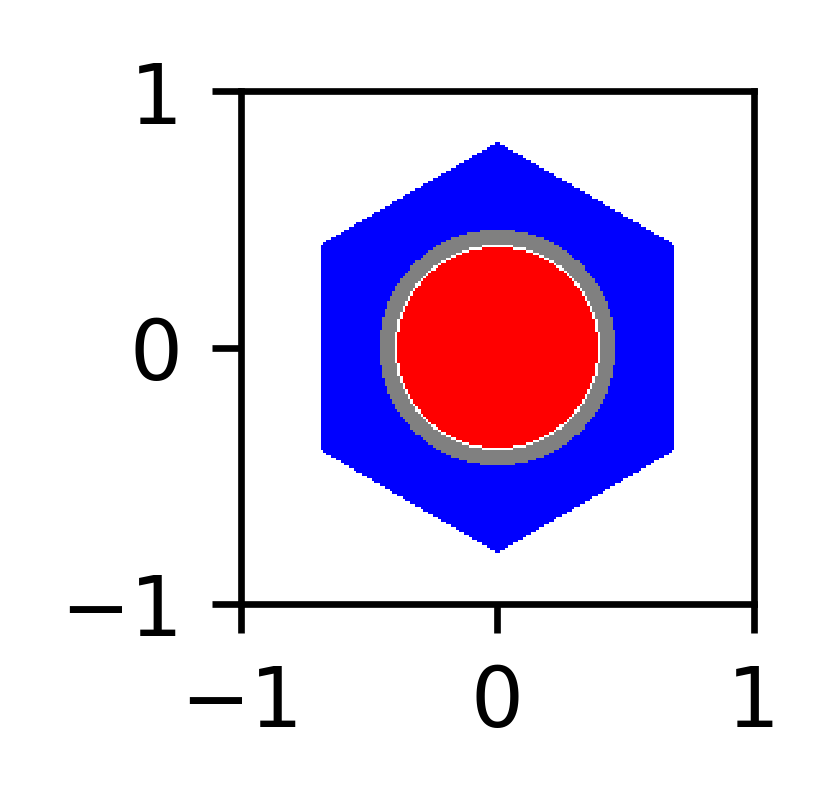

In [53]:
# Extra code not showed in Lab
universe = openmc.Universe(cells=[fuel, gap, clad, moderator])
plot = universe.plot(width=(2, 2),colors={fuel: 'red', gap: 'white', clad: 'gray', moderator: 'blue'})
# plt.rcParams["figure.figsize"] = [1.50, 1.50]
# plt.rcParams["figure.dpi"] = 600
plt.savefig('plot_fuelpin.png')